# ECN-142 Course Project
Simulation of Long channel MOSFET in iPython notebook

## Problem statement

Plot the value of electric field as a function of distance from source (towards drain) of an n-channel MOSFET with Vg = 4V$_{th}$ and Vd = 0.5V$_{th}$ and Vs = 0. First obtain the value of I$_{d}$. Divide the channel length into sections of ΔL length. Obtain the values of Q$_{d}$, Q$_{i}$ , transverse electric field Ex and longitudinal electric field E$_{y}$ at the source-edge of the channel (y = 0). Consider the values of E$_{x}$ and E$_{y}$ to be constants within each section ΔL. Now, obtain the values of Q$_{d}$, Q$_{i}$, E$_{x}$ and E$_{y}$ at y = ΔL. Keep repeating this process till the you reach V$_{d}$ (the V$_{d}$ = 0.5V$_{th}$ case) or V$_{d}$-sat (the V$_{d}$ = 6V$_{th}$ case). Do your
results seem consistent? Do this work in the following two manners:

## Import statements

In [266]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import math
import random

from __future__ import division

## Constant declaration

In [267]:
permitivity_free_space = 8.85418782E-14     #cm^-3 kg^-1 s^4 A^2
epsilon_Si = 11.9
e = 1.6E-19 #C
mew = 1500     

work_metal=4.6
e_a_si=4.05

epsilon_ox = 4
t_ox = 10E-7 #cm
c_ox = epsilon_ox * permitivity_free_space / t_ox

#######################################################
channel_width = 0.36 # Change it to some sensible value
#######################################################
channel_length = 5E-4 #cm
del_y = 1E-5

acceptor_ion_density = 1E15 #cm-3
intrinsic_carrier_density = 1.5E10;

phi_f = 0.026 * math.log(acceptor_ion_density / intrinsic_carrier_density)
band_gap = 1.1 #eV

drain_current = 0
drain_current_second = 0

print phi_f

0.288793969278


## Calculation of V$_{fb}$ and V$_{th}$

In [268]:
def flat_band_voltage():
    return (work_metal-e_a_si + -1 * ((band_gap / 2) + phi_f))

In [269]:
def threshold_voltage():
    return ((2 * phi_f) + flat_band_voltage() + math.sqrt(2 * phi_f * 2 * e * permitivity_free_space * epsilon_Si * acceptor_ion_density) / c_ox)

In [270]:
print ("Fermi Energy: " + str(phi_f))
print ("Flatband voltage: " + str(flat_band_voltage()))
print ("Threshold voltage: " + str(threshold_voltage()))
print ("Cox: " + str(c_ox))

Fermi Energy: 0.288793969278
Flatband voltage: -0.288793969278
Threshold voltage: 0.328196414249
Cox: 3.541675128e-07


## Calculation of V$_{gs}$, V$_{ds}$, V$_{s}$ &  V$_{dsat}$ 

In [271]:
gate_voltage = 4 * threshold_voltage()
drain_voltage = 0.5 * threshold_voltage()
voltage_saturation = gate_voltage - threshold_voltage()
source_voltage = 0

print ("Gate voltage: " + str(gate_voltage))
print ("Drain voltage: " + str(drain_voltage))
print ("Source voltage: " + str(source_voltage))
print ("Saturation voltage: " + str(voltage_saturation))

Gate voltage: 1.312785657
Drain voltage: 0.164098207125
Source voltage: 0
Saturation voltage: 0.984589242747


## Calculation of I$_{ds}$

In [272]:
drain_current = (mew * c_ox * channel_width * ((gate_voltage - threshold_voltage()) * drain_voltage - (drain_voltage**2) / 2) / channel_length)
print ("Drain current: " + str(drain_current))

Drain current: 0.0566503814942


## Calculation of V$_{y}$

In [273]:
def delta_voltage_y(voltage_y):
    numerator = drain_current * del_y
    denominator = mew  * c_ox * (gate_voltage - threshold_voltage() - voltage_y)
    return 1 * numerator / denominator

## Calculation of Q$_{i}$

In [274]:
def inversion_charge(voltage_y):
    return c_ox * (gate_voltage - threshold_voltage() - voltage_y)

## Calculation of Q$_{d}$

In [275]:
def depletion_charge(voltage_y):
    return math.sqrt(2 * permitivity_free_space * epsilon_Si * e * acceptor_ion_density * (2 * phi_f + voltage_y))

## Calculation of E$_{x}$

In [276]:
def electric_field_x(voltage_y):
    return (inversion_charge(voltage_y) + depletion_charge(voltage_y)) / (permitivity_free_space * epsilon_Si)

## Calculation of I$_{d}$ (second method)

In [281]:
first = mew * channel_width * c_ox / channel_length
second = (gate_voltage - flat_band_voltage() - 2 * phi_f) * drain_voltage
third = -1 * drain_voltage**2 / 2
fourth = -2/3 * math.sqrt(2 * e * permitivity_free_space * acceptor_ion_density) / c_ox * ((drain_voltage + 2 * phi_f)**1.5 - (2*phi_f)**1.5)
drain_current_second = first * (second + third + fourth)  

print drain_current_second

0.0583579006357


## Plot of V$_{y}$

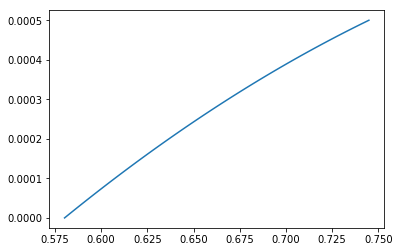

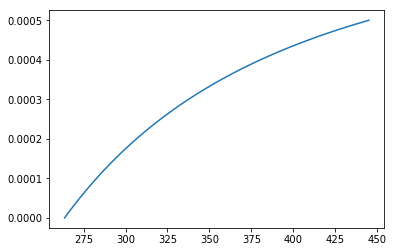

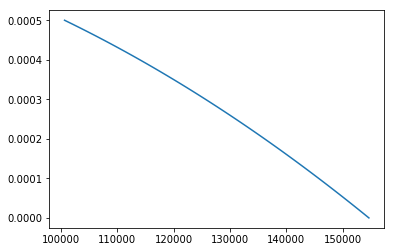

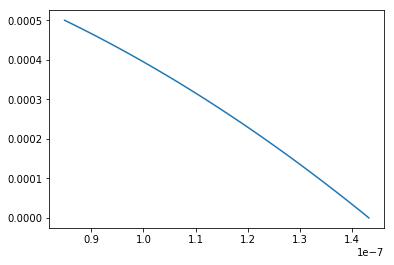

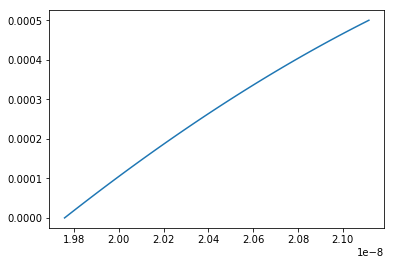

Number of iterations : 51


In [278]:
voltage_y_list = []
positions = []
electric_field_x_list = []
electric_field_y_list = []
inv_charge_list = []
depletion_charge_list = []

initial_v_y = 2 * phi_f
current_v_y = initial_v_y

i = 0

#print "Vy\t\tWth\t\tdVy\t\ty"
while ((current_v_y < (drain_voltage + 2 * phi_f)) and (current_v_y < voltage_saturation) and (i < 100) ):
    #print "1"
    #print str(current_v_y) + " " + str(drain_voltage + 2 * phi_f) + " " + str(delta_voltage_y(current_v_y)) + " " + str(i*del_y)
    current_v_y += delta_voltage_y(current_v_y)
    voltage_y_list.append(current_v_y)
    positions.append(i * del_y)
    electric_field_y_list.append(delta_voltage_y(current_v_y) / del_y)
    inv_charge_list.append(inversion_charge(current_v_y))
    depletion_charge_list.append(depletion_charge(current_v_y))
    electric_field_x_list.append(electric_field_x(current_v_y))
    i += 1

plt.plot(voltage_y_list, positions)
plt.xlabel="Vy"
plt.show()

plt.plot(electric_field_y_list, positions)
plt.xlabel="Ey"
plt.show()

plt.plot(electric_field_x_list, positions)
plt.xlabel="Ex"
plt.show()

plt.plot(inv_charge_list, positions)
plt.xlabel="Qi"
plt.show()

plt.plot(depletion_charge_list, positions)
plt.xlabel="Qd"
plt.show()

print "Number of iterations : " + str(i)

## Calculation of Q$_{i}$